1.Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
crimes = pd.read_csv('fatal-police-shootings-data.csv')
crimes.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


2.Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [58]:
df = crimes.groupby(['race','signs_of_mental_illness']).id.count().to_frame()
df

id
race signs_of_mental_illness      
A    False                      69
     True                       24
B    False                    1114
     True                      184
H    False                     745
     True                      157
N    False                      64
     True                       14
O    False                      37
     True                       11
W    False                    1763
     True                      713

In [59]:
df.rename(columns={"id": "volume"}, inplace=True)
df

volume
race signs_of_mental_illness        
A    False                        69
     True                         24
B    False                      1114
     True                        184
H    False                       745
     True                        157
N    False                        64
     True                         14
O    False                        37
     True                         11
W    False                      1763
     True                        713

In [60]:
df1 = crimes.groupby('race').id.count().to_frame()
df1

,id
race,
A,93
B,1298
H,902
N,78
O,48
W,2476


In [61]:
df = df.join(df1)
df

volume    id
race signs_of_mental_illness              
A    False                        69    93
     True                         24    93
B    False                      1114  1298
     True                        184  1298
H    False                       745   902
     True                        157   902
N    False                        64    78
     True                         14    78
O    False                        37    48
     True                         11    48
W    False                      1763  2476
     True                        713  2476

In [62]:
df.rename(columns={"id": "total"}, inplace=True)
df

volume  total
race signs_of_mental_illness               
A    False                        69     93
     True                         24     93
B    False                      1114   1298
     True                        184   1298
H    False                       745    902
     True                        157    902
N    False                        64     78
     True                         14     78
O    False                        37     48
     True                         11     48
W    False                      1763   2476
     True                        713   2476

3.Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [63]:
df['percentage'] = df.apply(lambda row: round(row.volume/row.total*100, 2), axis=1)
df

volume  total  percentage
race signs_of_mental_illness                           
A    False                        69     93       74.19
     True                         24     93       25.81
B    False                      1114   1298       85.82
     True                        184   1298       14.18
H    False                       745    902       82.59
     True                        157    902       17.41
N    False                        64     78       82.05
     True                         14     78       17.95
O    False                        37     48       77.08
     True                         11     48       22.92
W    False                      1763   2476       71.20
     True                        713   2476       28.80

In [64]:
df.percentage.max(level=1)

signs_of_mental_illness
False    85.82
True     28.80
Name: percentage, dtype: float64

In [65]:
df[df['percentage'] == 28.80]

,,volume,total,percentage
race,signs_of_mental_illness,,,
W,True,713,2476,28.8


#### Wśród białych osób było procentowo najwięcej ofiar interwencji wykazujących oznaki choroby psychicznej.

4.Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [66]:
crimes['date'] = pd.to_datetime(crimes['date'])

In [67]:
crimes['date'][1]

Timestamp('2015-01-02 00:00:00')

In [68]:
crimes['day_of_week'] = crimes['date'].dt.day_name()
crimes.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,day_of_week
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [69]:
day_intervention = crimes.groupby('day_of_week').id.count().to_frame()
day_intervention

,id
day_of_week,
Friday,761
Monday,726
Saturday,721
Sunday,753
Thursday,810
Tuesday,816
Wednesday,829


In [70]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_intervention = day_intervention.reindex(days)
day_intervention

,id
day_of_week,
Monday,726
Tuesday,816
Wednesday,829
Thursday,810
Friday,761
Saturday,721
Sunday,753


Text(0.5, 1.0, 'Interventions by days of week')

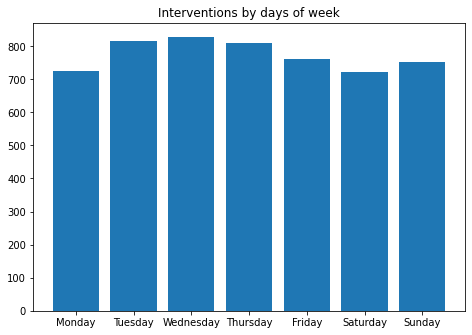

In [71]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.bar(day_intervention.index, day_intervention.id)

plt.title('Interventions by days of week')

5.Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [72]:
population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)[0]
population.head()

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]"
0,1.0,NaN,California,39512223,37254523,6.1%,"+2,257,700",NaN,718404,745514,702885,11.96%
1,NaN,NaN,Texas,28995881,25145561,15.3%,"+3,850,320",NaN,763050,805441,698503,8.68%
2,NaN,NaN,Florida,21477737,18801310,14.2%,"+2,676,427",NaN,740611,795472,696468,6.44%
3,NaN,NaN,New York,19453561,19378102,0.4%,"+75,459",NaN,670812,720502,717707,5.91%
4,NaN,NaN,Pennsylvania,12801989,12702379,0.8%,"+99,610",NaN,640099,711222,705715,3.87%


In [73]:
states = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=0)[0]
states.head(20)

,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).1","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).2","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).4","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO a

In [74]:
states.columns[0]

'Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)'

In [75]:
states.columns[3]

'Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3'

In [76]:
states.rename(columns={"Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP)": "State", "Codes:  ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)  ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2)  USPS 2-letter codes used by the United States Postal Service  USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations:  GPO Older variable-length official US Government Printing Office abbreviations  AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).3": "Abbreviation"}, inplace=True)
states

,State,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).1","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).2",Abbreviation,"Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).4","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).5","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).6","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows differences between GPO and AP).7","Codes: ISO ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2) ANSI 2-letter and 2-digit codes from the ANSI standard INCITS 38:2009 (supersedes FIPS 5-2) USPS 2-letter codes used by the United States Postal Service USCG 2-letter codes used by the United States Coast Guard (bold red text shows differences between ANSI and USCG) Abbreviations: GPO Older variable-length official US Government Printing Office abbreviations AP Abbreviations from the AP Stylebook (bold red text shows diff

In [77]:
population = pd.merge(population,states[['State','Abbreviation']],on='State', how='left')
population.head()

,"Rank in states & territories, 2019","Rank in states & territories, 2010",State,"Population estimate, July 1, 2019[2]","Census population, April 1, 2010[3]","Percent change, 2010–2019[note 1]","Absolute change, 2010-2019","Total seats in the U.S. House of Representatives, 2013–2023","Estimated population per electoral vote, 2019[note 2]","Estimated population per House seat, 2019","Census population per House seat, 2010","Percent of the total U.S. population, 2018[note 3]",Abbreviation
0,1.0,NaN,California,39512223,37254523,6.1%,"+2,257,700",NaN,718404,745514,702885,11.96%,CA
1,NaN,NaN,Texas,28995881,25145561,15.3%,"+3,850,320",NaN,763050,805441,698503,8.68%,TX
2,NaN,NaN,Florida,21477737,18801310,14.2%,"+2,676,427",NaN,740611,795472,696468,6.44%,FL
3,NaN,NaN,New York,19453561,19378102,0.4%,"+75,459",NaN,670812,720502,717707,5.91%,NY
4,NaN,NaN,Pennsylvania,12801989,12702379,0.8%,"+99,610",NaN,640099,711222,705715,3.87%,PA


In [78]:
crimes_ratio = crimes.groupby('state').id.count().to_frame()
crimes_ratio

,id
state,
AK,39
AL,104
AR,83
AZ,254
CA,799
CO,195
CT,21
DC,13
DE,13


In [79]:
crimes_ratio['state'] = crimes_ratio.index
crimes_ratio.index = range(crimes_ratio.shape[0])
crimes_ratio

,id,state
0,39,AK
1,104,AL
2,83,AR
3,254,AZ
4,799,CA
5,195,CO
6,21,CT
7,13,DC
8,13,DE
9,350,FL


In [80]:
crimes_ratio.rename(columns={"id": "No_of_crimes", "state": "Abbreviation"},inplace=True)
crimes_ratio.head()

,No_of_crimes,Abbreviation
0,39,AK
1,104,AL
2,83,AR
3,254,AZ
4,799,CA


In [81]:
crimes_ratio = pd.merge(crimes_ratio,population[['State','Population estimate, July 1, 2019[2]','Abbreviation']],on='Abbreviation', how='left')
crimes_ratio

,No_of_crimes,Abbreviation,State,"Population estimate, July 1, 2019[2]"
0,39,AK,Alaska,731545
1,104,AL,Alabama,4903185
2,83,AR,Arkansas,3017825
3,254,AZ,Arizona,7278717
4,799,CA,California,39512223
5,195,CO,Colorado,5758736
6,21,CT,Connecticut,3565287
7,13,DC,District of Columbia,705749
8,13,DE,Delaware,973764
9,350,FL,Florida,21477737


In [82]:
crimes_ratio.rename(columns={"Population estimate, July 1, 2019[2]": "Population", "No_of_crimes": "Crimes"},inplace=True)
crimes_ratio.head()

,Crimes,Abbreviation,State,Population
0,39,AK,Alaska,731545
1,104,AL,Alabama,4903185
2,83,AR,Arkansas,3017825
3,254,AZ,Arizona,7278717
4,799,CA,California,39512223


In [83]:
def function(x,y):
    return round(x/y*1000, 4)

crimes_ratio['No_of_incidents_per_1000_inhabitants'] = crimes_ratio.apply(lambda x: function(x.Crimes, x.Population), axis=1)
crimes_ratio

,Crimes,Abbreviation,State,Population,No_of_incidents_per_1000_inhabitants
0,39,AK,Alaska,731545,0.0533
1,104,AL,Alabama,4903185,0.0212
2,83,AR,Arkansas,3017825,0.0275
3,254,AZ,Arizona,7278717,0.0349
4,799,CA,California,39512223,0.0202
5,195,CO,Colorado,5758736,0.0339
6,21,CT,Connecticut,3565287,0.0059
7,13,DC,District of Columbia,705749,0.0184
8,13,DE,Delaware,973764,0.0134
9,350,FL,Florida,21477737,0.0163
